In [10]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict, Annotated
load_dotenv()

True

In [11]:
model = ChatGroq(model="llama-3.3-70b-versatile")


In [12]:
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph.message import add_messages

class ChatState(TypedDict):
    message: Annotated[list[BaseMessage], add_messages]

In [13]:
def Chat(state: ChatState):
    message = state['message']
    response = model.invoke(message)
    return {'message': [response]}

In [14]:
graph = StateGraph(ChatState)

In [15]:
graph.add_node('Chat', Chat)

In [16]:
graph.add_edge(START, "Chat")
graph.add_edge("Chat", END)


In [22]:
from langgraph.checkpoint.memory import MemorySaver

checkpoint = MemorySaver()

In [24]:
app = graph.compile(checkpointer=checkpoint)

In [23]:
thread_id = 1

config = {"configurable": {"thread_id": thread_id}}

In [25]:
while True:
    user = input("Type here: ")
    if user.strip().lower() in ['bye', 'exit', 'quit']:
        break
    result = app.invoke({'message': [HumanMessage(content=user)]}, config=config)
    print(result['message'][-1].content)

Hi Ketan, it's nice to meet you. Is there something I can help you with or would you like to chat?
Your name is Ketan.


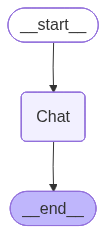

In [19]:
graph.compile()

In [ ]:
app.get_state(config=config)

StateSnapshot(values={'message': [HumanMessage(content='hii my name is ketan', additional_kwargs={}, response_metadata={}, id='8cd9c45c-4a88-4099-b4b6-c3b9cb534a18'), AIMessage(content="Hi Ketan, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 42, 'total_tokens': 69, 'completion_time': 0.056390099, 'prompt_time': 0.001942264, 'queue_time': 0.052728615, 'total_time': 0.058332363}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--a0f54ced-b6dd-42aa-b6b9-04b5c5d7db80-0', usage_metadata={'input_tokens': 42, 'output_tokens': 27, 'total_tokens': 69}), HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='4c250b19-3f7a-40f8-93a7-99a41c5014f2'), AIMessage(content='Your name is Keta